In [ ]:
import numpy as np
import pandas as pd

import os
df = pd.read_csv('dataset.csv')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

Немного про датасет:<br>
Unnamed: 0 - нумерация в датасете<br>
track_id - уникальный идентификатор трека, строка из букв и цифр<br>
artists - исполнители трека, перечисленные через ;<br>
album_name - имя альбома<br>
track_name - название трека<br>
popularity - популярность трека, таргетная переменная от 0 до 100<br>
duration_ms - продолжительность в миллисекундах<br>
explicit - наличие откровенных высказывание в тексте true/false<br>
danceability - танцевальность от 0 до 1<br>
energy - энергичность трека от 0 до 1<br>
key - тональность, целое число от 0 до 11<br>
loudness - громкость трека, дробное число<br>
mode - режим аудиозаписи, значения 0 или 1<br>
speechiness - красноречивость текста в песне от 0 до 1<br>
acousticness - качество звука от 0 до 1<br>
instrumentalness - показатель звучания музыкальных инструментов от 0 до 1<br>
liveness - живость песни от 0 до 1<br>
valence - валентность песни от 0 до 1<br>
tempo - темп песни в BPM, дробное число от 0 до 250<br>
time_signature - размер такта, целое число от 0 до 4<br>
track_genre - жанр песни, категориальный признак(строка)<br>


In [ ]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df['popularity']

,popularity
0,73
1,55
2,57
3,71
4,82
...,...
113995,21
113996,22
113997,22
113998,41


Считаем их

In [ ]:
df['popularity'].value_counts()

,count
popularity,
0,16020
22,2354
21,2344
44,2288
1,2140
...,...
96,7
94,7
95,5


Смотрим уникальные

In [ ]:
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

Теперь надо убрать пропуски в массиве

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df.shape

(113999, 21)

Теперь разберем на категориальные и количественные

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numerical_features

['Unnamed: 0',
 'popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

<h1>Аналитика</h1>

Так как колонка является про id, то можно от неё избавиться

In [ ]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
df['track_id']

,track_id
0,5SuOikwiRyPMVoIQDJUgSV
1,4qPNDBW1i3p13qLCt0Ki3A
2,1iJBSr7s7jYXzM8EGcbK5b
3,6lfxq3CG4xtTiEg7opyCyx
4,5vjLSffimiIP26QG5WcN2K
...,...
113995,2C3TZjDRiAzdyViavDJ217
113996,1hIz5L4IB9hN3WRYPOCGPw
113997,6x8ZfSoqDjuNa5SVP5QjvX
113998,2e6sXL2bYv4bSz6VTdnfLs


Смотрим уникальные

In [ ]:
len(df['track_id'].unique())

89740

Позднее выяснислось, что некоторы песни дублируются

In [ ]:
df['track_id'].value_counts(sort=True).head()

,count
track_id,
6S3JlDAGk3uu3NtZbPnuhS,9
2Ey6v4Sekh3Z0RUSISRosD,8
2kkvB3RNRzwjFdGhaUA0tz,8
08kTa3SL9sV6Iy8KLKtGql,7
4XYieGKSlJlHpzB3bl6WMP,7


Одинаковые песни, но с разными жанрами!

In [ ]:
df.loc[df['track_id'] == '2Ey6v4Sekh3Z0RUSISRosD']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8284,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,blues
11192,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,british
19933,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,country
34991,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,folk
47282,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,hard-rock
84194,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,psych-rock
99898,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,singer-songwriter
102897,2Ey6v4Sekh3Z0RUSISRosD,Derek & The Dominos,70s Christmas Party,Layla,0,423680,False,0.459,0.89,1,-3.246,1,0.0487,0.451,0.11,0.306,0.447,115.654,4,songwriter


Далее посмотрим жанры по ключевой переменной

<Axes: >

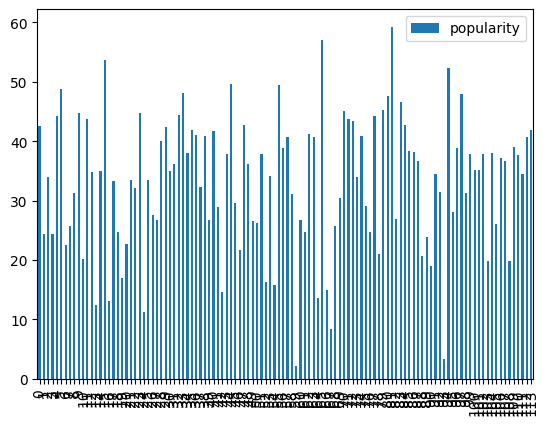

In [ ]:
df.groupby(["track_genre"], as_index=False).agg({"popularity": "mean"}).plot.bar()


Уменьшим количество жанров

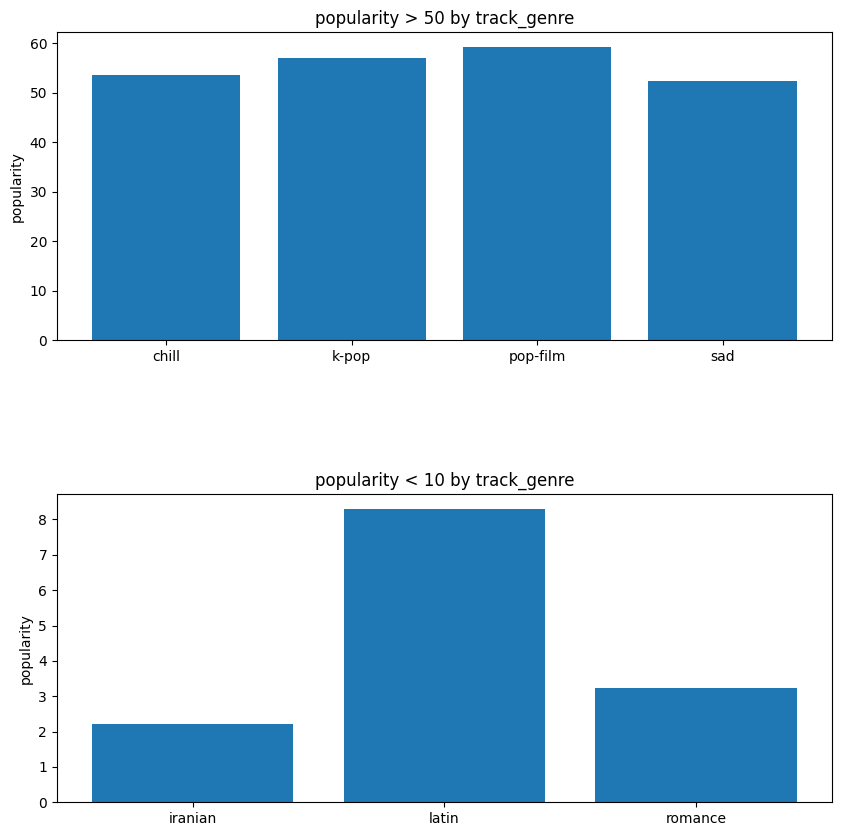

In [ ]:
group = df.groupby(["track_genre"], as_index=False).agg({"popularity": "mean"})
groups_queries = ("popularity > 50", "popularity < 10")
groups = (group.query(query) for query in groups_queries)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for ax, gr, info in zip(axes, groups, groups_queries):
    ax.bar(gr["track_genre"], gr["popularity"])
    ax.set_ylabel('popularity')
    ax.set_title(f'{info} by track_genre')

plt.show()

Мало, возьмемь больше

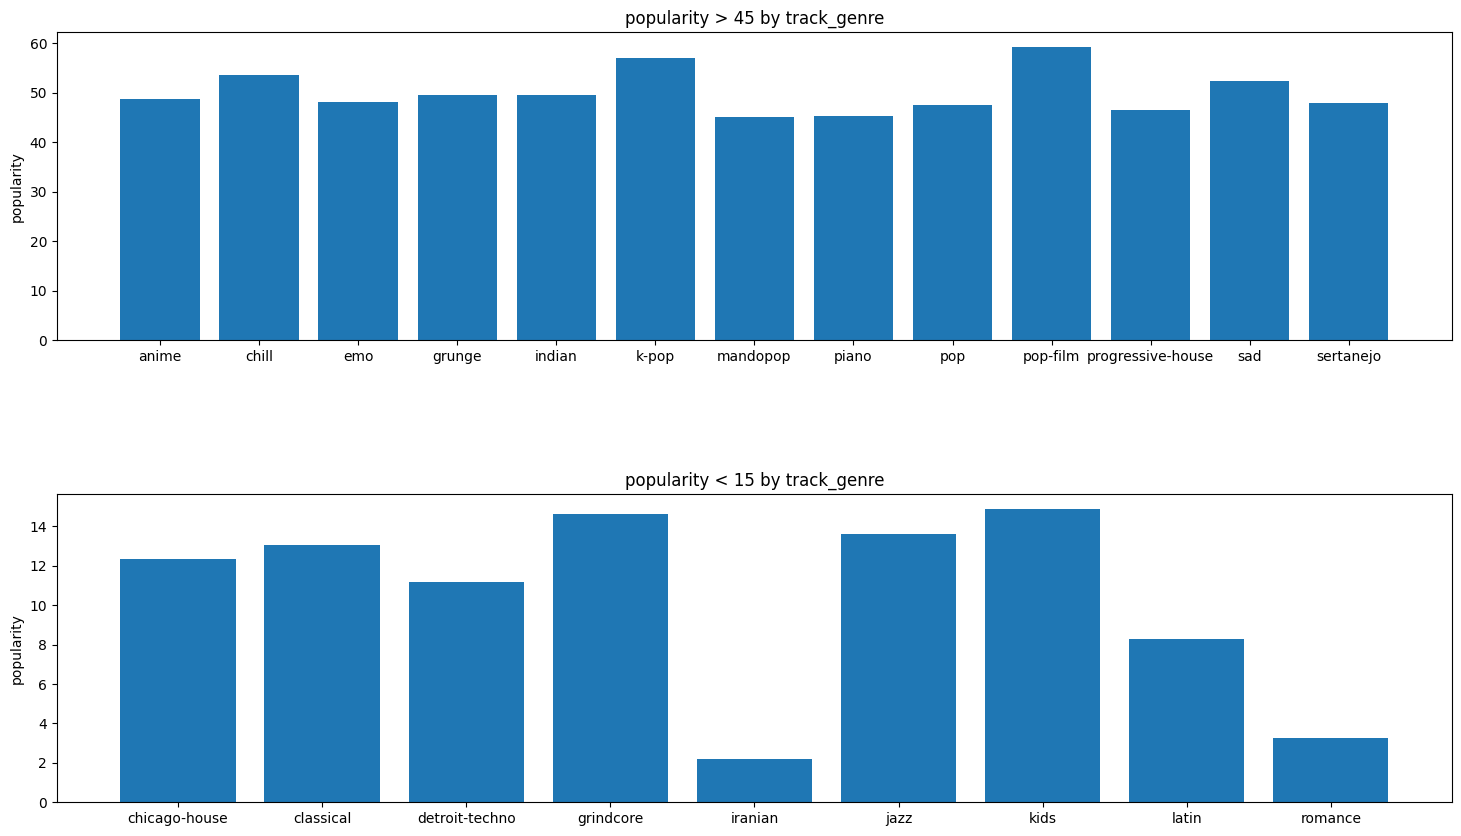

In [ ]:
group = df.groupby(["track_genre"], as_index=False).agg({"popularity": "mean"})
groups_queries = ("popularity > 45", "popularity < 15")
groups = (group.query(query) for query in groups_queries)

fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

for ax, gr, info in zip(axes, groups, groups_queries):
    ax.bar(gr["track_genre"], gr["popularity"])
    ax.set_ylabel('popularity')
    ax.set_title(f'{info} by track_genre')

plt.show()

<h3>Вывод по графику:</h3>
<b>Наиболее популярные: anime, chill, emo, grunge, indian, k-pop, mandopop, piano, pop, progressive-house, sad и sertanejo</b><br>
<b>Наименее популярные: iranian и romance</b>

<b>Гипотеза:</b> Песни с наличием откровенных высказывание в тексте (explit) пользуются большей популярностью нежели чем без них.<br>
Проверим её

<Axes: xlabel='explicit'>

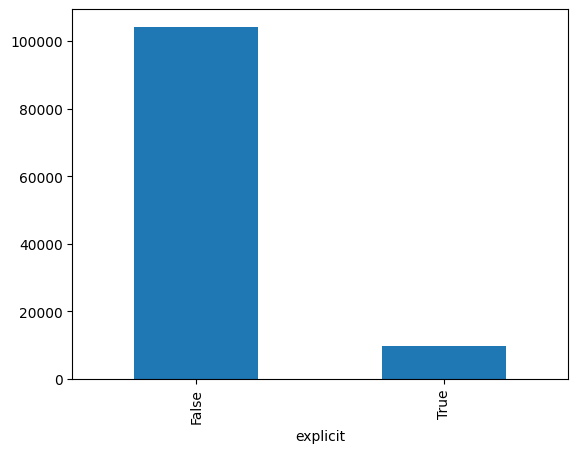

In [ ]:
df['explicit'].value_counts().plot.bar()

[Text(0, 0, 'False'), Text(1, 0, 'True')]

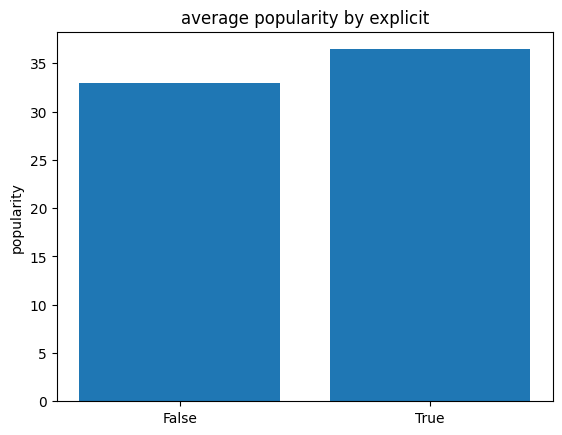

In [ ]:
group = df.groupby(['explicit'], as_index=False).agg({'popularity': 'mean'})

fig, ax = plt.subplots()

ax.bar(group['explicit'], group['popularity'])
ax.set_ylabel('popularity')
ax.set_title('average popularity by explicit')
ax.set_xticks([0, 1])
ax.set_xticklabels(group['explicit'])

<h3>Вывод по графику:</h3>
<b>Гипотеза подтвердилась, однако с лишь небольшой разнице в популярности</b>


<b>Далее посмотрим влияние продолжительности по тем же критериям</b>

Добавим новые значение длительности в минутах и секундах

In [ ]:
df['duration_sec'] = df['duration_ms'] / 1000
df['duration_min'] = df['duration_sec'] / 60

In [ ]:
df.drop(columns=['duration_ms', 'duration_sec'], inplace=True)

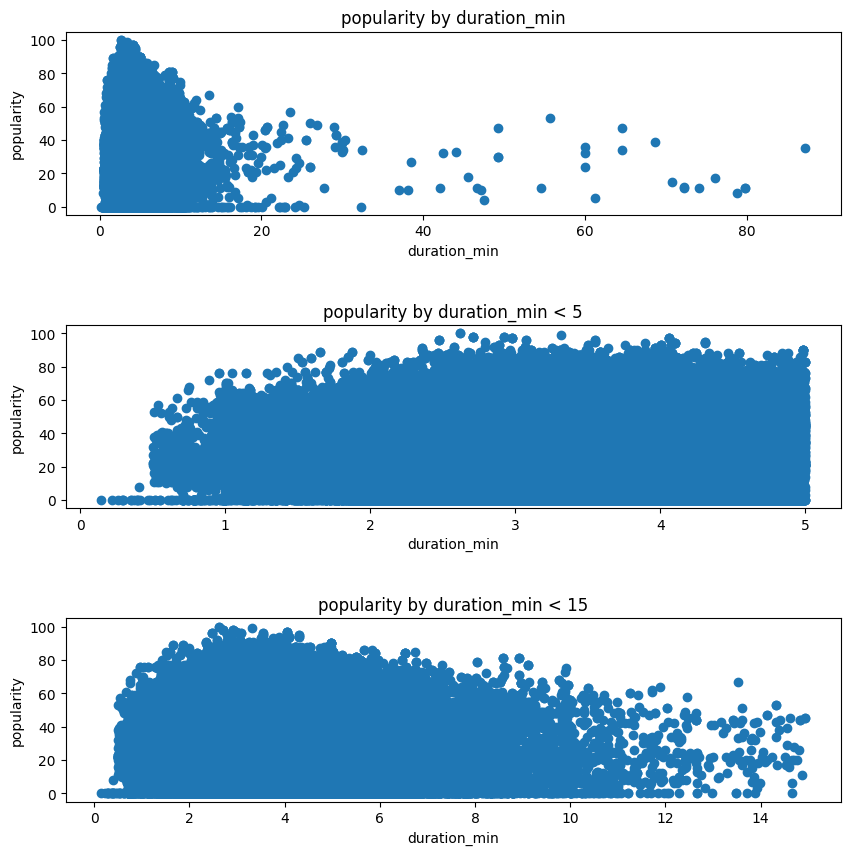

In [ ]:
groups = {
    "duration_min": df,
    "duration_min < 5": df.query("duration_min < 5"),
    "duration_min < 15": df.query("duration_min < 15"),
}

fig, axes = plt.subplots(len(groups), 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.6)

for ax, (query, gr) in zip(axes, groups.items()):
    ax.scatter(gr["duration_min"], gr["popularity"])
    ax.set_xlabel("duration_min")
    ax.set_ylabel("popularity")
    ax.set_title(f"popularity by {query}")

plt.show()

<h3>Вывод по графикам:</h3>
<b>Наибольшая популярность идет на треки от 2 и до 4 минут</b><br>
Треки дольше 4 минут имеют постепенный спад популярности относительно длительности<br>
Треки меньше двух минут имеют минимальную популярность


<b>Как 'танцевальность' (danceability) влияет на популярность?</b>

In [ ]:
df['danceability'].sort_values().unique()

array([0.    , 0.0513, 0.0532, ..., 0.983 , 0.984 , 0.985 ])

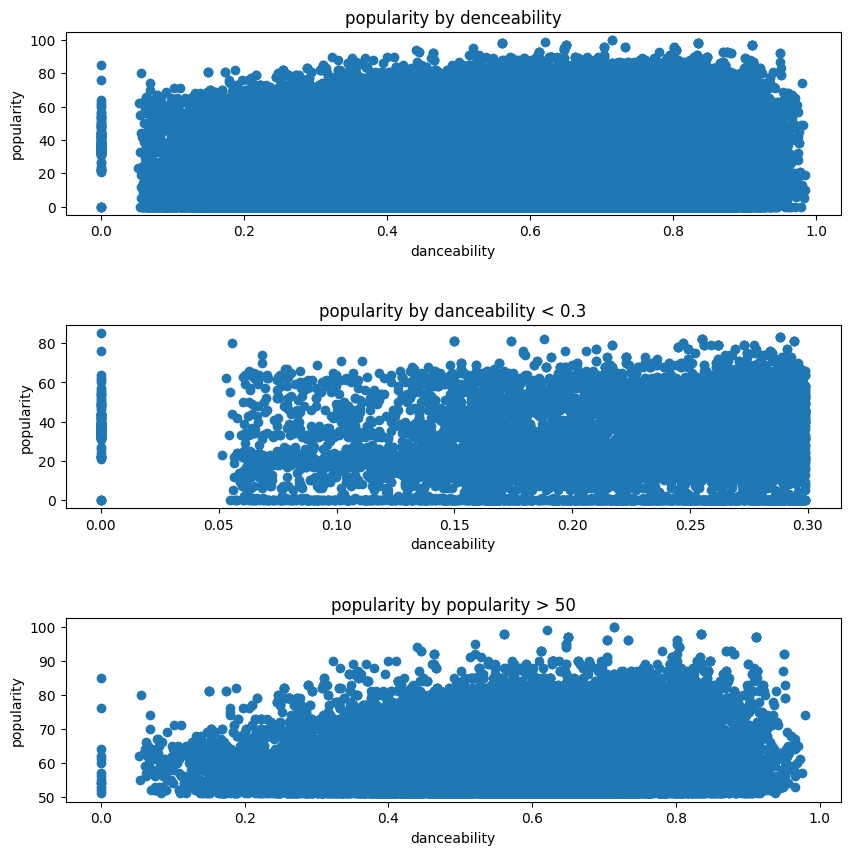

In [ ]:
groups = {
    "denceability": df,
    "danceability < 0.3": df.query("danceability < 0.3"),
    "popularity > 50": df.query("popularity > 50"),
}

fig, axes = plt.subplots(len(groups), 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.6)

for ax, (query, gr) in zip(axes, groups.items()):
    ax.scatter(gr["danceability"], gr["popularity"])
    ax.set_xlabel("danceability")
    ax.set_ylabel("popularity")
    ax.set_title(f"popularity by {query}")

plt.show()

При 'танцевальности' близкому к нулю есть провал по популярности, однако при нуле высокая популярность. Нужно проверить почему так

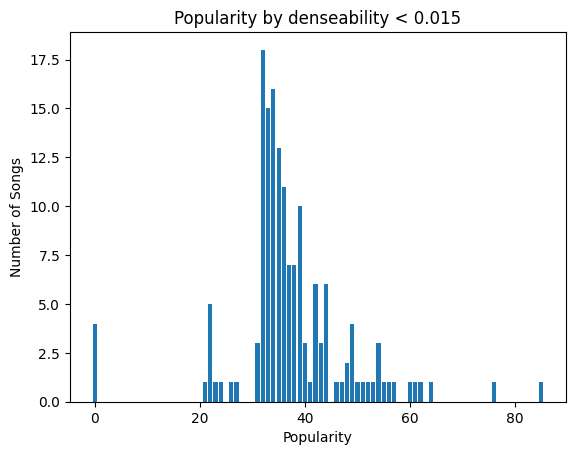

In [ ]:
dt = df.loc[df['danceability'] < 0.015]
popularity_counts = dt['popularity'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.bar(popularity_counts.index, popularity_counts.values)
ax.set_xlabel("Popularity")
ax.set_ylabel("Number of Songs")
ax.set_title("Popularity by denseability < 0.015")

plt.show()

<h3>Выводы:</h3>
<b>При "танцевальности" равной нулю популярность трека с большой вероятностью будет находится от 30 до 40</b><br>
Треки с наибольшей популярностью в основном имеют danceability от 0.3 до 0.9

<b>Далее пройдемся по tempo</b>

In [ ]:
df['tempo'].sort_values().unique()

array([  0.   ,  30.2  ,  30.322, ..., 220.525, 222.605, 243.372])

In [ ]:
df["tempo"] = df["tempo"].round().astype("int")

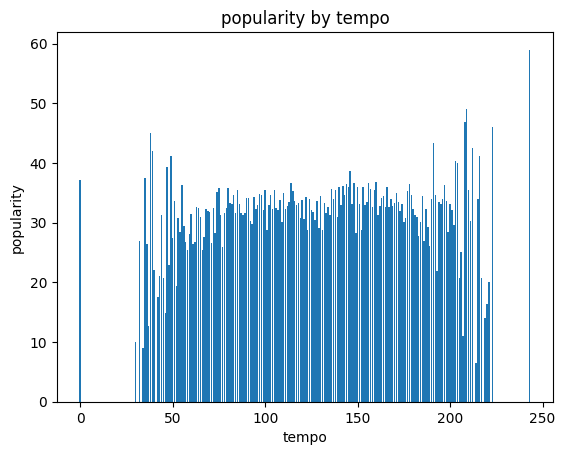

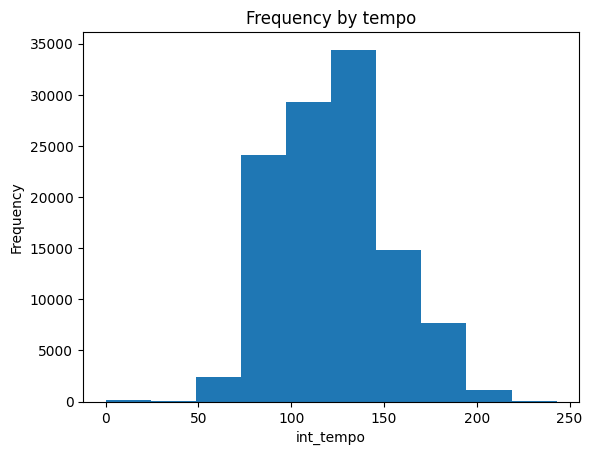

In [ ]:
group = df.groupby(["tempo"], as_index=False).agg({"popularity": "mean"})
fig, ax = plt.subplots()

ax.bar(group["tempo"], group["popularity"])
ax.set_xlabel("tempo")
ax.set_ylabel("popularity")
ax.set_title(f"popularity by tempo")
plt.show()


df["tempo"].plot.hist()

plt.title("Frequency by tempo")
plt.xlabel("int_tempo")
plt.ylabel("Frequency")
plt.show()

<h3>Выводы по графику:</h3>
<b>При "танцевальности" равной нулю популярность трека с большой вероятностью будет находится от 30 до 40</b><br>
Треки с наибольшей популярностью в основном имеют danceability от 0.3 до 0.9

<b>Проверим влияние key на таргетную переменную popularity</b>

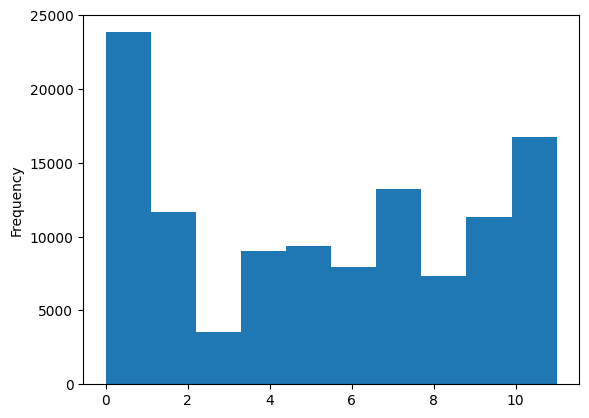

In [ ]:
df['key'].plot.hist()
plt.show()


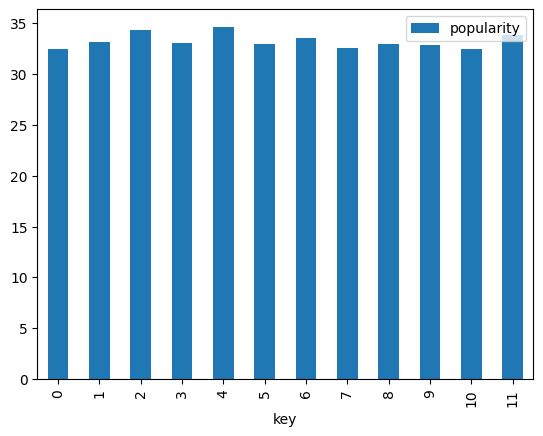

In [ ]:
df.groupby("key").agg({"popularity": "mean"}).plot.bar()
plt.show()

<h3>Выводы по графикам:</h3>
Влияние на популярность неоднозначное.

<h2>Общие выводы по аналитике:</h2>

- Наиболее популярные: anime, chill, emo, grunge, indian, k-pop, mandopop, piano, pop, progressive-house, sad и sertanejo<br>
- Наименее популярные: iranian и romance<br>
- Песни с наличием откровенных высказывание в тексте пользуются большей популярностью нежели чем без них<br>
- Наибольшая популярность идет на треки от 2 и до 4 минут<br>
- При "танцевальности" равной нулю популярность трека с большой вероятностью будет находится от 30 до 40<br>

<h1>Фича инженеринг</h1>

In [ ]:
artists = (df.groupby(["artists"], as_index=False).agg({"track_id": "count"}).rename(columns={"track_id": "tracks_count"}))
artists["artists"] = artists["artists"].str.split(";")
artists = (artists.explode("artists").groupby(["artists"], as_index=False).agg({"tracks_count": "sum"}).rename(columns={"artists": "artist"}))

artist_track_count = artists.set_index("artist")["tracks_count"].to_dict()

In [ ]:
def tracks_by_artists(artists: str):
    average = 0
    artists_list = artists.split(";")
    for artist in artists_list:
        average += artist_track_count[artist]
    return average / len(artists_list)

Выясним количество треков у испольнителей, однако важно учесть, что у трека есть несколько исполнителей

In [ ]:
df['mean_tracks_count'] = df["artists"].apply(tracks_by_artists) #средее число треков

In [ ]:
df.loc[df["album_name"] == df["track_name"], "is_same_album"] = True
df["is_same_album"] = df["is_same_album"].fillna(False)

<ipython-input-39-2ada2b7d8747>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["is_same_album"] = df["is_same_album"].fillna(False)


In [ ]:
albums_count = (df.groupby(["album_name"], as_index=False).agg({"track_id": "count"}).rename(columns={"track_id": "count_in_album"}).set_index("album_name")["count_in_album"].to_dict())
#кол-во треков в альбоме
df["count_in_album"] = df["album_name"].apply(lambda x: albums_count[x])
df['count_artists'] = df["artists"].apply(lambda x: len(x.split(";")))

Совместим танцевальность и продолжительность

In [ ]:
df['dance_duration'] = df["danceability"] ** 0.5 * df["duration_min"] #при обработке danceability берем корень, чтобы значения получились не самые маленькие

In [ ]:
df["is_remix"] = df["track_name"].str.lower().str.contains("remix", na=False)

Громкость, Энергичность и Танцевальность

In [ ]:
df['loudness'].sort_values().unique()

array([-49.531, -49.307, -46.591, ...,   2.574,   3.156,   4.532])

In [ ]:
df['loudness_energy'] = (df['loudness']+100)*df['energy'] #loudness содержит отрицательные значения, поэтому добавим 100 и увеличим значения

In [ ]:
df['loudness_energy_danceability'] = (df['loudness']+100)*df['energy']*df['danceability']

<h1>Кодирование</h1>

In [ ]:
df = df.drop(columns=['track_id'])
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    l1 = LabelEncoder()
    df[col] = l1.fit_transform(df[col])
    label_encoders[col] = l1

In [ ]:
df.isnull().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0


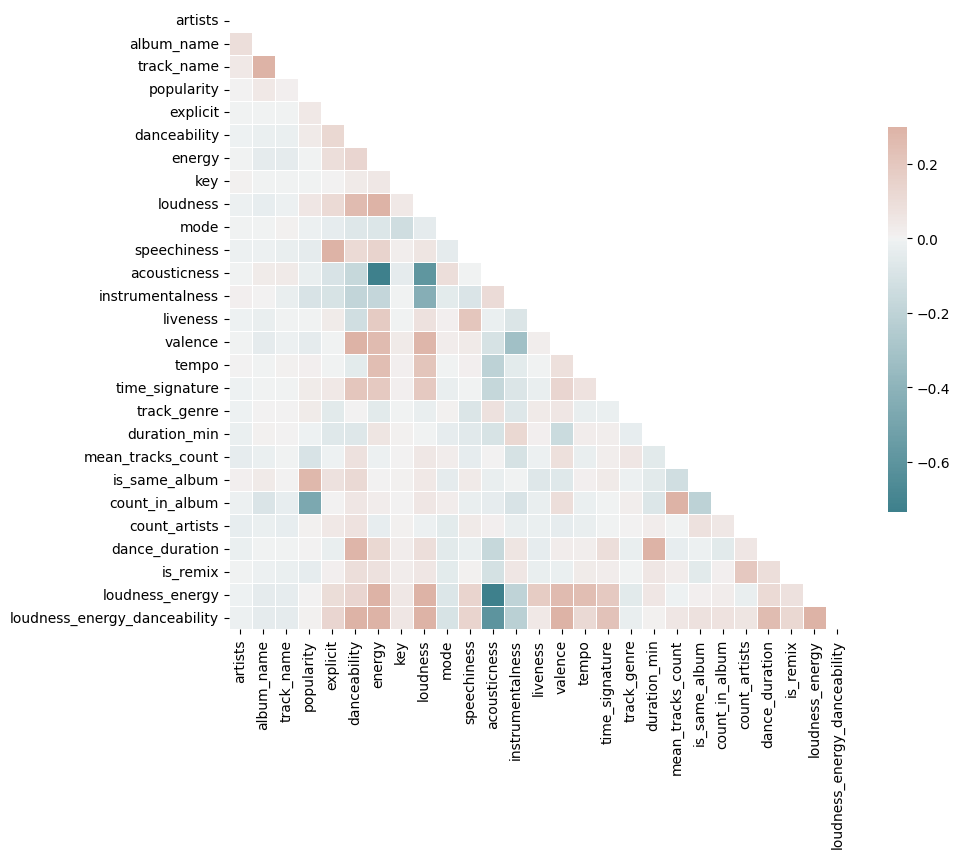

In [ ]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(210, 22, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<h3>Выводы по графику:</h3>
<b>Корреляция с popularity небольшая</b>

<h1>Обучение модели</h1>

In [ ]:
X = df.drop(columns=['popularity']); y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
class Params:
    def lr_schedule(epoch, lr):
        return lr * 0.95**epoch


    @classmethod
    def get_optimizer(cls):
        return Adam(learning_rate=cls.learning_rate)


    learning_rate = 0.001
    scaler = StandardScaler()
    scheduler = LearningRateScheduler(lr_schedule)
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    callbacks = [early_stopping, scheduler]
    loss = "mean_squared_error"
    epochs = 10
    batch_size = 32
    val_split = 0.2

In [ ]:
scaler = Params.scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
#метрики
def print_metrics(model):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mse ** 0.5

    print(f"\nMetrics for {model}: \n")
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    print(f'R2: {r2}')

In [ ]:
def show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

# Compile the model
model.compile(optimizer=Params.get_optimizer(), loss=Params.loss)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=Params.epochs,
    batch_size=Params.batch_size,
    validation_split=Params.val_split,
    callbacks=Params.callbacks
)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 490.0620 - val_loss: 311.4720 - learning_rate: 0.0010
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 302.0305 - val_loss: 297.3366 - learning_rate: 9.5000e-04
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 288.7392 - val_loss: 290.3692 - learning_rate: 8.5738e-04
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 282.6765 - val_loss: 284.4518 - learning_rate: 7.3509e-04
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 276.2876 - val_loss: 278.4112 - learning_rate: 5.9874e-04
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 271.7602 - val_loss: 274.1111 - learning_rate: 4.6329e-04
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 264.5079 - val_loss: 271.8789 - learning_rate: 3.4056e-04
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 264.2032 - val_loss: 269.1514 - learning_rate: 2.3783e-04
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5

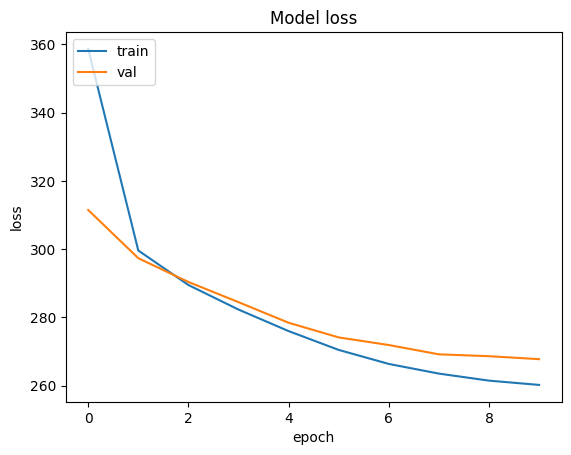

In [ ]:
show_loss(history)

In [ ]:
print_metrics(model)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Metrics for <Sequential name=sequential, built=True>: 

MAE: 12.50198896030585
RMSE: 16.292764810120488
MAPE: 7073480954661173.0
R2: 0.46490663290023804


713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

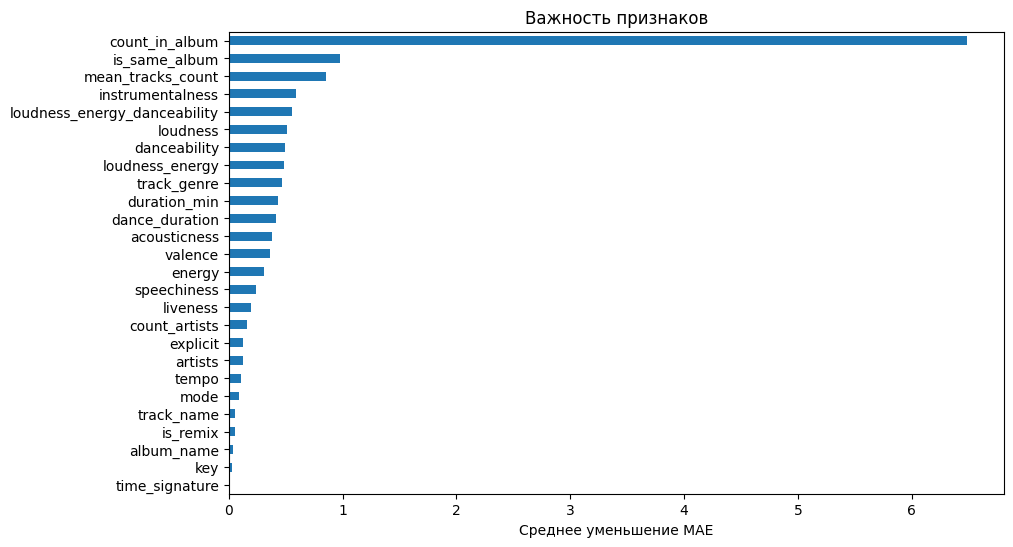

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

count_in_album показывает хорошие показатели в модели. time_signature вообще не ппоказал свою важность в модели

<h1>Эксперимнты с моделями</h1>

<h2>Линейная модель</h2>

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

print("Linear Regression")
print("Coefficients: \n")
print(reg.coef_, reg.intercept_)
print_metrics(reg)

Linear Regression
Coefficients: 

[  0.03018313  -0.08684711  -0.19385985   0.85647709   1.95069949
 -12.24693451  -0.03624384  -0.53839243  -0.13108881  -1.93085759
  -1.07593019  -3.01495865   0.27128989  -1.14750632  -0.02014325
   0.19077569   0.64466565  -0.27009018   2.45324384   3.81009313
 -11.09374973   0.40683364  -0.1730641   -0.52569708  13.36242237
  -1.93012752] 33.298643625478356

Metrics for LinearRegression(): 

MAE: 15.310689302668703
RMSE: 18.73657404481493
MAPE: 1.3178689102825522e+16
R2: 0.2923469944527973


<h2>Дерево решений</h2>

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

print_metrics(clf)


Metrics for DecisionTreeRegressor(): 

MAE: 8.758004385964913
RMSE: 15.109558595965412
MAPE: 1751663223487787.8
R2: 0.5398032549290409


<h2>Градиентный бустинг</h2>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

print_metrics(reg)


Metrics for GradientBoostingRegressor(random_state=42): 

MAE: 12.126436572713365
RMSE: 15.64530140139888
MAPE: 7098324676935674.0
R2: 0.5065901031567883


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

print_metrics(reg)


Metrics for HistGradientBoostingRegressor(random_state=42): 

MAE: 9.621499560489235
RMSE: 12.99182369249658
MAPE: 5091725178867373.0
R2: 0.6597640307324713


<h2>Ближайшие соседи</h2>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

print_metrics(neigh)


Metrics for KNeighborsRegressor(): 

MAE: 11.774640350877196
RMSE: 16.175381716800707
MAPE: 5991288704278550.0
R2: 0.47258914436830457


<h2>Нейронные сети</h2>

In [ ]:
def train_model(model):
    model.compile(optimizer=Params.get_optimizer(), loss=Params.loss)

    history = model.fit(
        X_train,
        y_train,
        epochs=Params.epochs,
        batch_size=Params.batch_size,
        validation_split=Params.val_split,
        callbacks=Params.callbacks,
        verbose=0
    )

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")

    print_metrics(model)
    show_loss(history)

In [ ]:
Params.epochs = 50

Эксперименты

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 232.0170
Test Loss: 232.67945861816406
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Metrics for <Sequential name=sequential_3, built=True>: 

MAE: 11.34512932996478
RMSE: 15.253829283147324
MAPE: 5533514740849452.0
R2: 0.5309730768203735


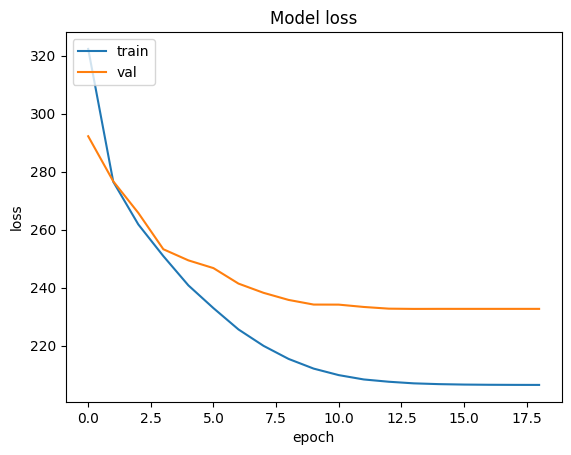

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Добавим ещё слой

713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 306.8318
Test Loss: 302.9925537109375
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Metrics for <Sequential name=sequential_5, built=True>: 

MAE: 13.328484311634512
RMSE: 17.406688158639444
MAPE: 6752824314001271.0
R2: 0.38923758268356323


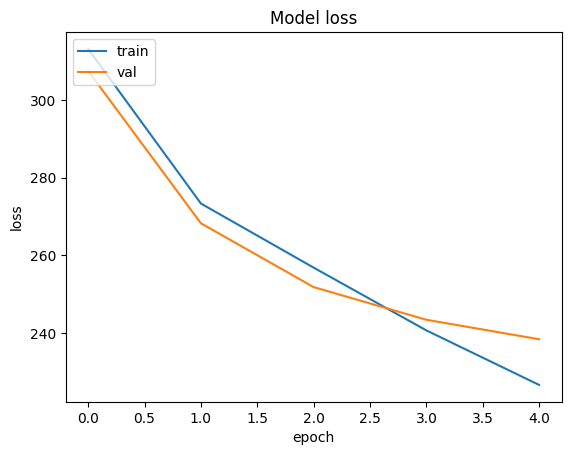

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Точность не изменилась, попробуем с Dropout и регуляризацией

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 315.6697
Test Loss: 309.80084228515625
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Metrics for <Sequential name=sequential_6, built=True>: 

MAE: 13.353469075225947
RMSE: 17.37771884272702
MAPE: 7026773560632325.0
R2: 0.391268789768219


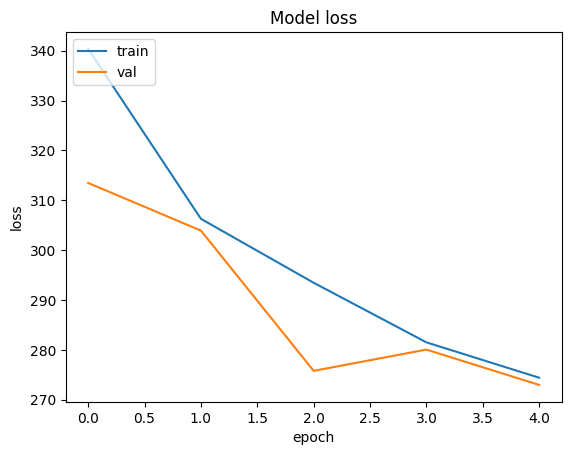

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(1024, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1),
    ]
)
train_model(model)

<h2>Общий вывод</h2><br>
Наилучшие показатели были:<br>
- DecisionTreeRegressor<br>
- HistGradientBoostingRegressor<br>
- RandomForestRegressor

<h1>Кросс валидация</h1>

In [ ]:
class Metrics_collector:
    def __init__(self, model):
        self.model = model
        self.mae_list = []
        self.rmse_list = []
        self.mape_list = []
        self.r2_list = []


        self.metrics = dict(zip(
            ["MAE", "RMSE", "MAPE", "R2"],
            (self.mae_list, self.rmse_list, self.mape_list, self.r2_list),
        ))

    def collect_metrics_cross_val(self, X_val, y_val):
        y_pred = self.model.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse**0.5
        mape = mean_absolute_percentage_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        self.mae_list.append(mae)
        self.rmse_list.append(rmse)
        self.mape_list.append(mape)
        self.r2_list.append(r2)

    def show(self):
        fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 9))
        fig.suptitle("Metrics by cross-validation folds")
        fig.subplots_adjust(hspace=0.4)
        axes = axes.flatten()

        for ax, (label, metric) in zip(axes, self.metrics.items()):
            ax.plot(metric, label=label)
            ax.set_xlabel("Fold")
            ax.set_title(f"{label}")

        plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor


kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = RandomForestRegressor(random_state=42, n_jobs=-1)
metrics = Metrics_collector(reg)

for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    reg.fit(X_train_fold, y_train_fold)
    metrics.collect_metrics_cross_val(X_val_fold, y_val_fold)

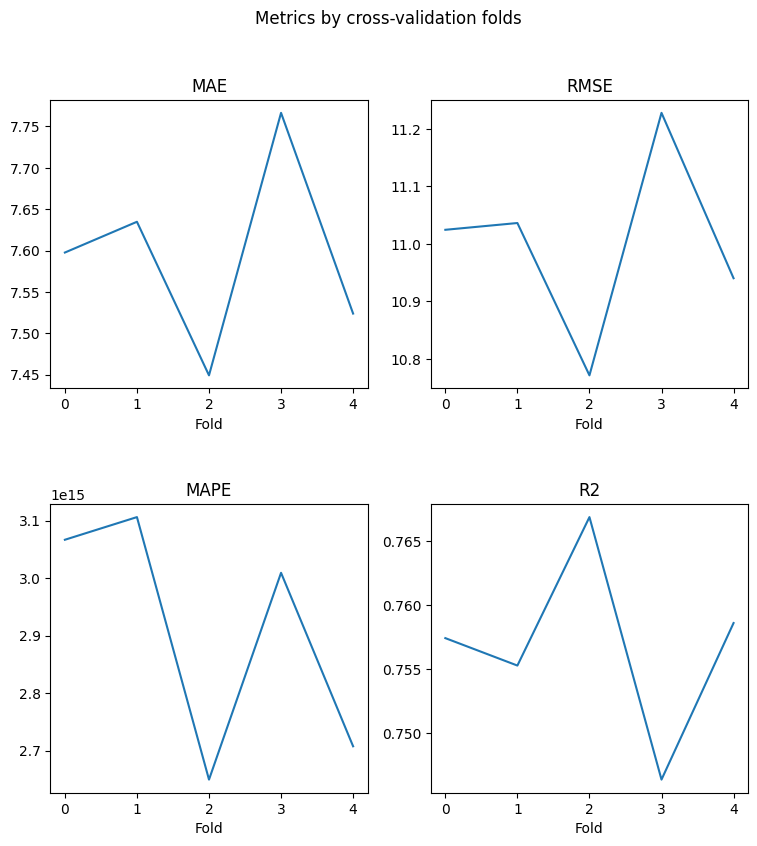

Точность на тестовых данных после кросс валидации

Metrics for RandomForestRegressor(n_jobs=-1, random_state=42): 

MAE: 7.472179040309106
RMSE: 10.833874820424759
MAPE: 2691682990905692.5
R2: 0.7634038819681519


In [ ]:
metrics.show()
print("Точность на тестовых данных после кросс валидации")
print_metrics(reg)

<h1>Вывод</h1>

(MAE) Модель в среднем ошибается на 7.4 едениц
(RMSE) Сильные отклонения составляют 10 едениц
(MAPE) Средняя абсолютная ошибка в процентах показывает слишком большое значение

R2 равен 0.76, что можно считать хорошим показателем.

Точность до кросс валидации и после практически одинаковая